In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.dates as dates
from dateutil.relativedelta import relativedelta
import urllib
import csv
import codecs
import json

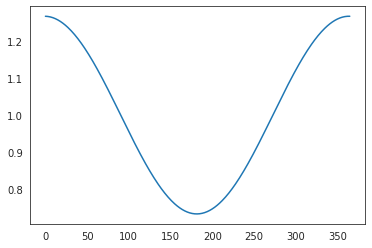

In [2]:
# generate sinusoidal seasonality


def season_multiplier(t, d0=1, gamma=0.267, peak=1) :
    period_fraction = (t - (peak - d0))/365
    
    return 1 + gamma * np.cos(2 * np.pi * period_fraction)


sinus = [season_multiplier(i) for i in range(1,367)]
xs = pd.to_datetime(range(1,366), format='%j') 
xs = [x + relativedelta(years=120) for x in xs]

plt.plot(sinus)

UK sources are all disaggregated by weather station. Would be rigorous...

https://catalogue.ceda.ac.uk/uuid/22f365d2006843c3b95ab89fe3fe0d24

Weird mix of mostly useless EU data

https://cds.climate.copernicus.eu/#!/search?text=ERA5&type=dataset

# Source 1: NASA by central lat/lon

https://power.larc.nasa.gov/data-access-viewer/

https://docs.ropensci.org/nasapower/reference/parameters.html

In [3]:
# #nasaStr = "https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&tempAverage=DAILY&identifier=SinglePoint&parameters=T2M&userCommunity=SB&lon=0&lat=0&startDate=20200101&endDate=20201231&outputList=CSV&user=DOCUMENTATION"
# url = "https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?"
# params = "T2M_MAX,T2M_MIN,T2M_RANGE"
# lower_left 50.2279, -6.1003 #(lat,lon) 
# upper_right 54.7279, -1.6003 #(lat,lon)

# nasaStr = url + f"&request=execute&tempAverage=DAILY&identifier=Regional&parameters={params}&userCommunity=AG&startDate=20200101&endDate=20201231&bbox=4.7649,-15.6610,9.2649,-11.1610&outputList=JSON&user=DOCUMENTATION"

# res = urllib.request.urlopen(nasaStr)
# cr = csv.reader(codecs.iterdecode(res, 'utf-8'))
# [row for row in cr]
    

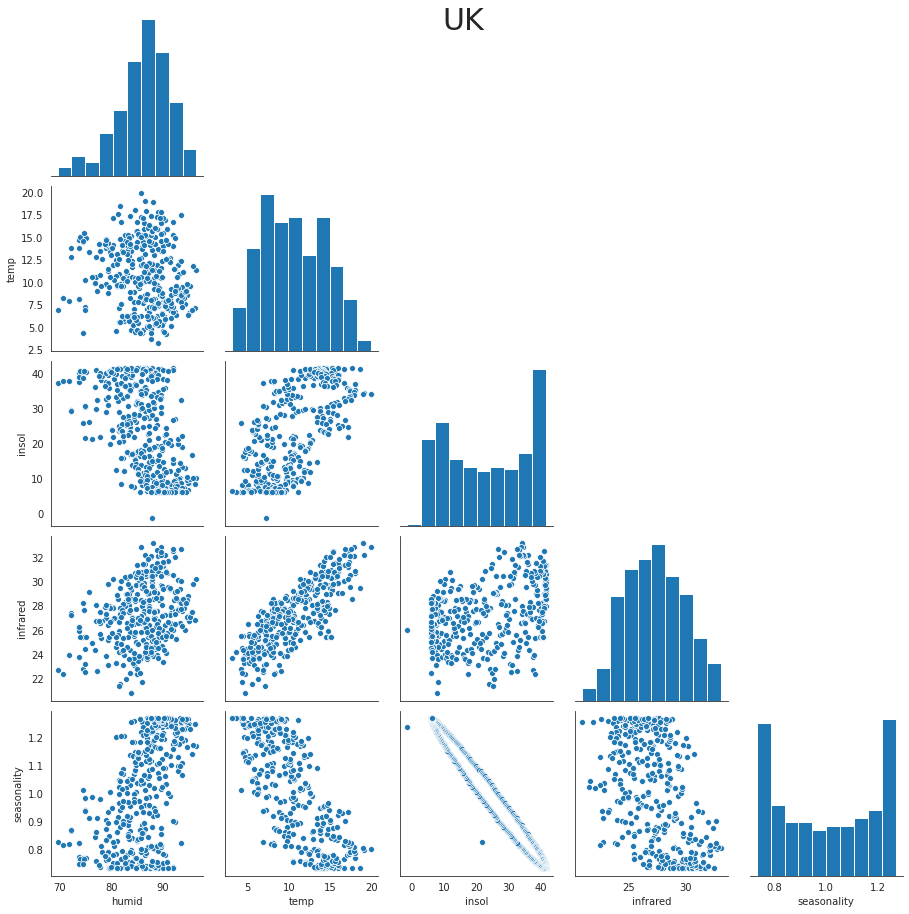

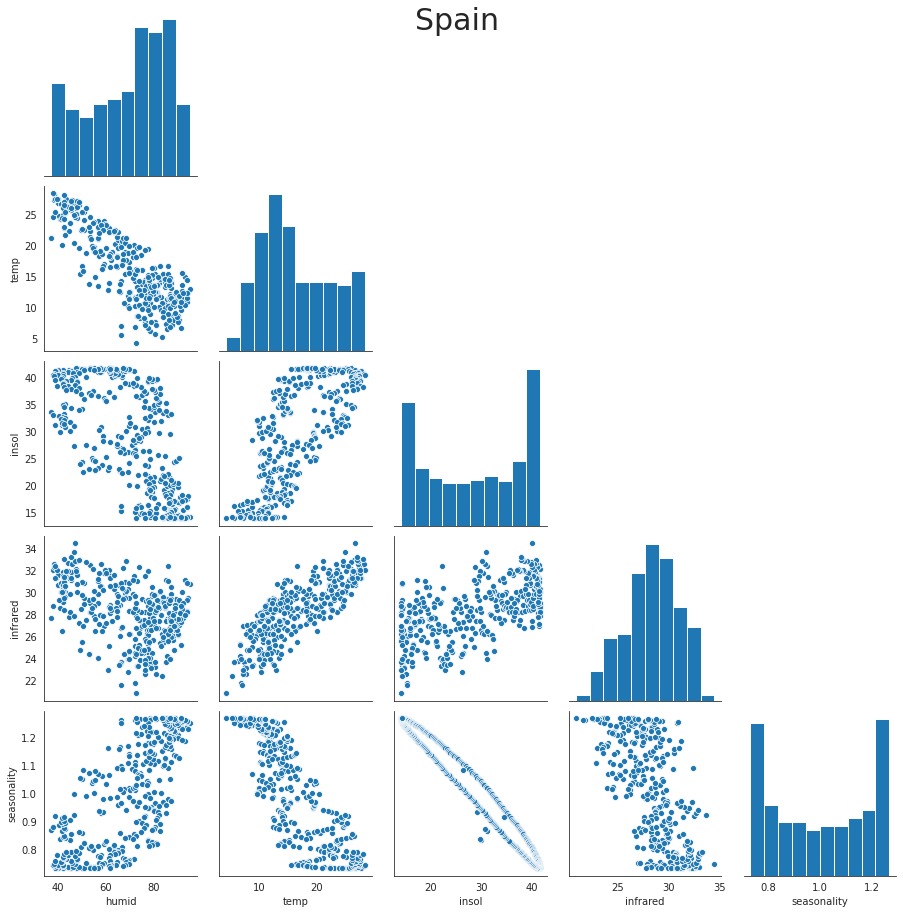

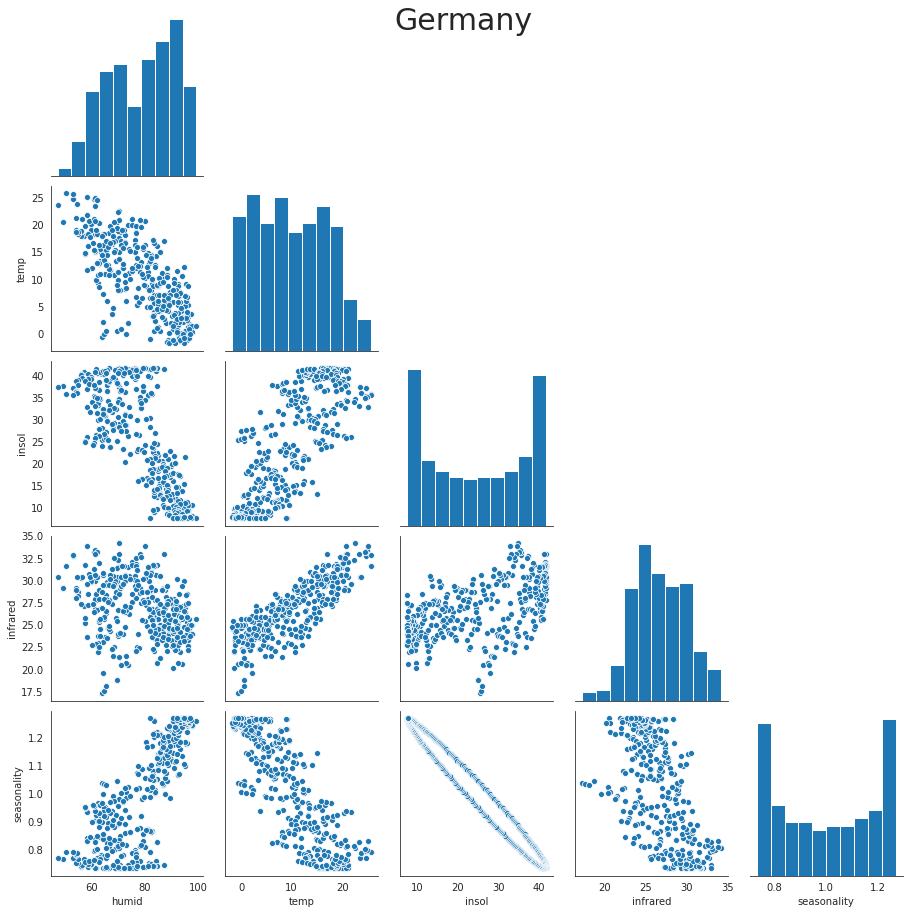

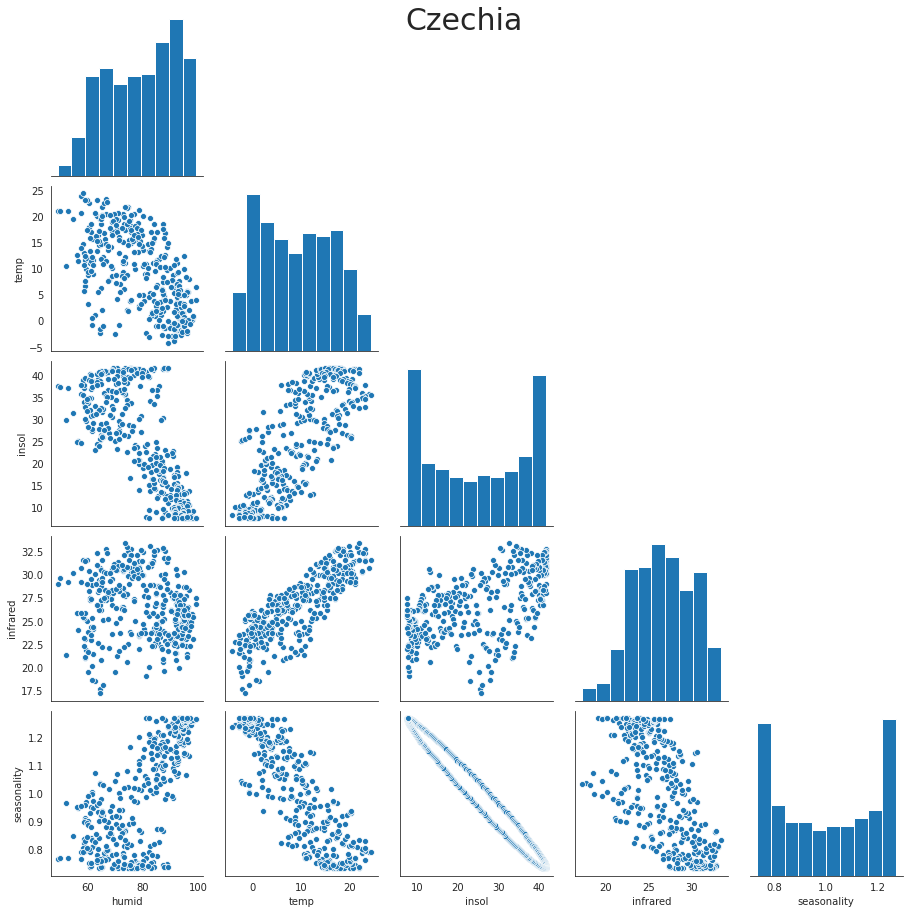

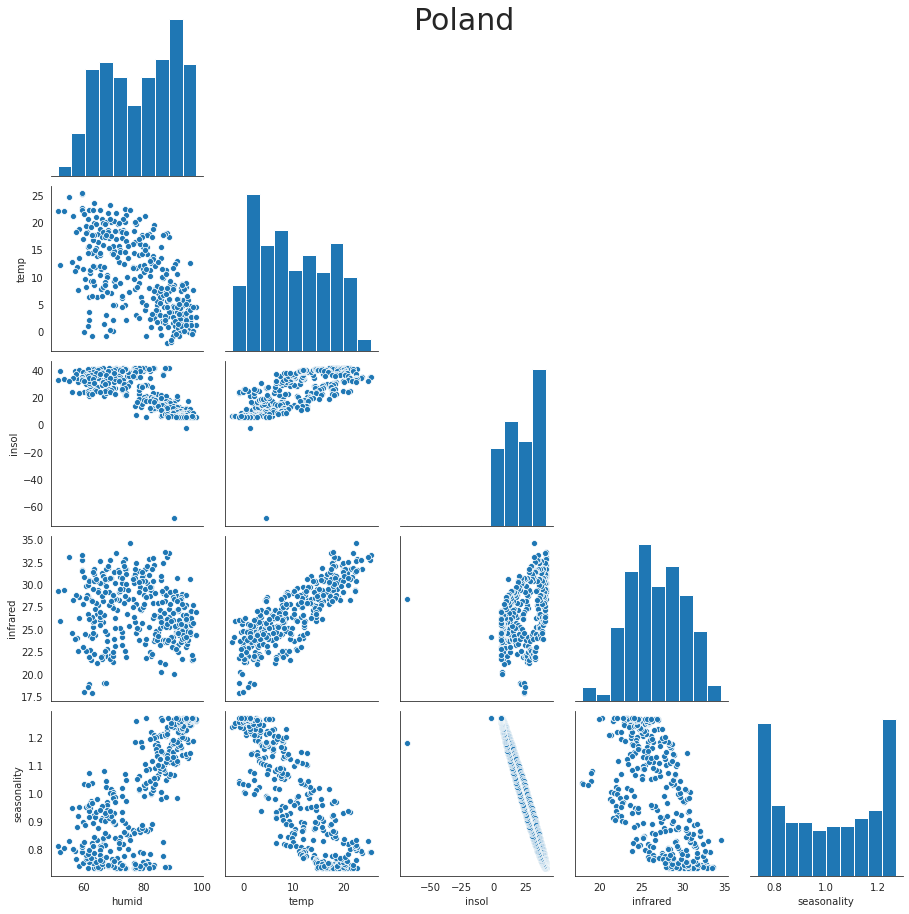

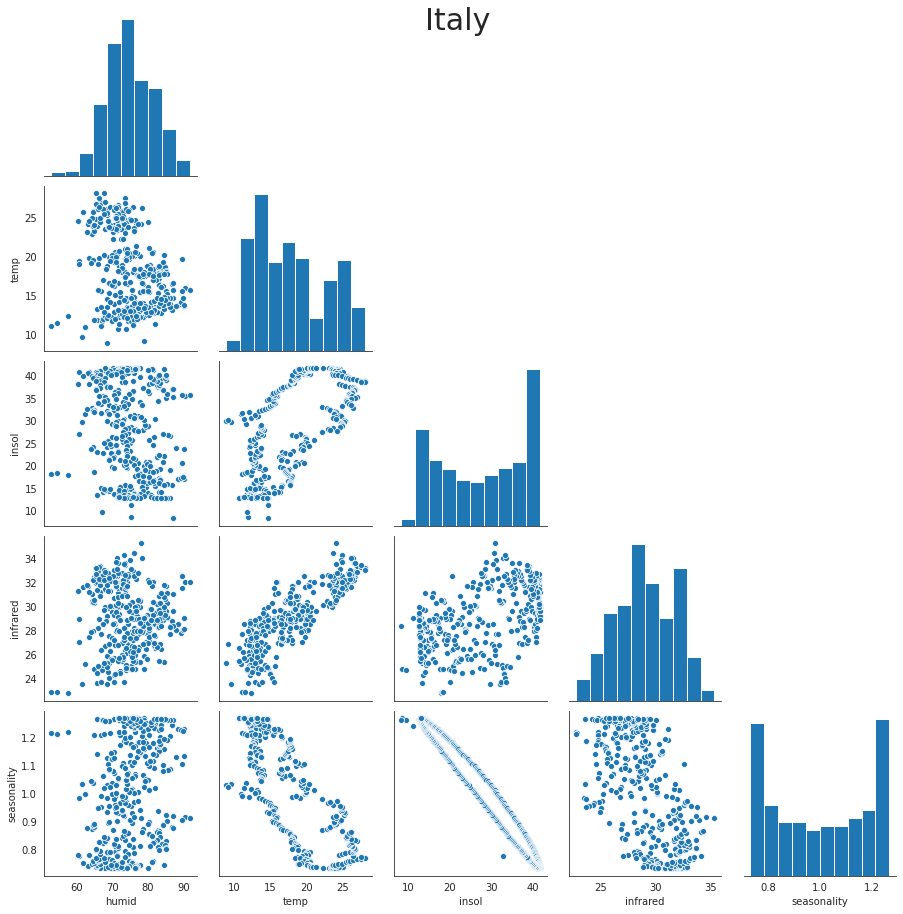

In [45]:
# UK
# lower_left 50.2279, -6.1003 #(lat,lon) 
# upper_right 54.7279, -1.6003 #(lat,lon)

def pairplot_POWER(path, c) :
    cdf = pd.read_csv(path, skiprows=range(13))
    cdf.columns = ["LAT", "LON", "YEAR", "DOY", "humid", "temp", "insol", "infrared"]
    means = cdf.groupby(["YEAR", "DOY"]).mean()
    means["seasonality"] = sinus
    g = sns.pairplot(means.drop(["LAT", "LON"], axis=1), corner=True)#, diag_kws={"linewidth": 0, "fill":False})#, "shade": False})
    g.fig.suptitle(c, y=1, fontsize=30)



# # RH2M Relative Humidity at 2 Meters
# # ALLSKY_TOA_SW_DWN Top-of-atmosphere Insolation #"All Sky Insolation Incident on a Horizontal Surface"

uk = "data/POWER_Regional_Daily_20200101_20201231_e1f88e04_uk.csv"
pairplot_POWER(uk, "UK")

spain = "data/POWER_Regional_Daily_20200101_20201231_3f52643a_es.csv"
pairplot_POWER(spain, "Spain")

de = "data/POWER_Regional_Daily_20200101_20201231_69b95207_de.csv"
pairplot_POWER(de, "Germany")

cz = "data/POWER_Regional_Daily_20200101_20201231_c30935a3_cz.csv"
pairplot_POWER(cz, "Czechia")

pl = "data/POWER_Regional_Daily_20200101_20201231_744d742f_pl.csv"
pairplot_POWER(pl, "Poland")

it = "data/POWER_Regional_Daily_20200101_20201231_e3d574bd_it.csv"
pairplot_POWER(it, "Italy")